## Artificial Intelligence Assignment 2
## No7. Neural Network 4
## 20132651 Sungjae Lee

In [1]:
import torch

In [2]:
 class TwoLayerNet(torch.nn.Module):
        def __init__(self, D_in, H, D_out):
            super(TwoLayerNet, self).__init__()
            self.linear1 = torch.nn.Linear(D_in, H)
            self.linear2 = torch.nn.Linear(H, D_out)
            
        def forward(self, x):
            h_relu = self.linear1(x).clamp(min = 0)
            y_pred = self.linear2(h_relu)
            return y_pred
        
# 두 개의 레이어를 갖는, Two Layer Net 을 구현하기 위한 하나의 클래스를 생성합니다.
# 생성시에 D_in, H, D_out 을 입력받아 생성하게 되며, 
# torch 의 Linear 함수를 사용하여 weight 를 구성하게 됩니다.
# 또한 forward 함수를 내장하여 predict 값을 반환하기도 합니다.

In [3]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 위의 코드와 동일한 설정입니다.

In [4]:
model = TwoLayerNet(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)
loss_list = []

# TwoLayerNet 의 init 을 활용하여 model 을 생성합니다
# torch 의 stochastic gradient descent 를 이용한 optimizer 를 구성합니다
# 이 때, lr (learning rate) 는 앞의 코드에서보다 작아진 1e - 04 값으로 진행합니다

In [5]:
for t in range(500):
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)
    
    print(t, loss.item())
    loss_list.append(loss.item())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

0 1.0938506126403809
1 1.0937199592590332
2 1.0935896635055542
3 1.0934593677520752
4 1.0933290719985962
5 1.0931988954544067
6 1.0930687189102173
7 1.0929385423660278
8 1.092808485031128
9 1.092678427696228
10 1.0925482511520386
11 1.0924183130264282
12 1.0922882556915283
13 1.0921581983566284
14 1.092028260231018
15 1.0918983221054077
16 1.0917683839797974
17 1.091638445854187
18 1.0915086269378662
19 1.0913786888122559
20 1.091248869895935
21 1.0911190509796143
22 1.090989351272583
23 1.0908595323562622
24 1.090729832649231
25 1.0906001329421997
26 1.0904704332351685
27 1.0903408527374268
28 1.090211272239685
29 1.0900816917419434
30 1.0899521112442017
31 1.0898226499557495
32 1.089693307876587
33 1.0895638465881348
34 1.0894345045089722
35 1.0893051624298096
36 1.0891759395599365
37 1.089046597480774
38 1.0889172554016113
39 1.0887882709503174
40 1.0886592864990234
41 1.0885303020477295
42 1.0884013175964355
43 1.0882724523544312
44 1.0881435871124268
45 1.0880147218704224
46 1.087

388 1.045352578163147
389 1.0452326536178589
390 1.0451126098632812
391 1.0449926853179932
392 1.044872760772705
393 1.044752836227417
394 1.0446330308914185
395 1.04451322555542
396 1.0443934202194214
397 1.0442736148834229
398 1.0441539287567139
399 1.0440342426300049
400 1.0439144372940063
401 1.0437947511672974
402 1.0436750650405884
403 1.043555498123169
404 1.04343581199646
405 1.0433162450790405
406 1.043196678161621
407 1.0430771112442017
408 1.0429575443267822
409 1.0428379774093628
410 1.0427184104919434
411 1.0425989627838135
412 1.0424795150756836
413 1.0423600673675537
414 1.0422407388687134
415 1.042121410369873
416 1.0420019626617432
417 1.0418826341629028
418 1.0417633056640625
419 1.0416439771652222
420 1.0415247678756714
421 1.041405439376831
422 1.0412862300872803
423 1.0411670207977295
424 1.0410478115081787
425 1.040928602218628
426 1.0408095121383667
427 1.040690302848816
428 1.0405712127685547
429 1.0404521226882935
430 1.0403330326080322
431 1.040213942527771
43

### (1) y_pred에 따른 loss (accuracy) 변화를 화면 출력 확인 (plot)

In [6]:
import matplotlib.pyplot as plt

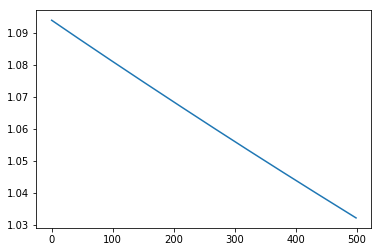

In [7]:
plt.plot(loss_list)
plt.show()

# loss 가 1.03 부터 0.98 까지 linear 하게 감소하는 모습을 볼 수 있습니다.

### (2) 앞 문제의 코드와 비교

In [8]:
# 앞 문제에서 loss 가 발산하는 문제를 겪었는데, 이번에는 learning rate 가 너무 작아
# 최적화된 값에 수렴하지 못하는 모습을 보이고 있습니다.
# 이를 해결하기 위해 learning rate 를 약간 더 큰 값으로 설정할 필요가 있습니다.

# 뿐만 아니라 Two Layer Net 이라는 클래스를 활용하여 손쉽게 2층 신경망을 생성하는 점 또한
# 앞의 코드와 큰 차이점이라고 볼 수 있습니다.